In [2]:
TSS = include("TikhonovSamarskiiSolve.jl")
TSE = TSS.TSE
using Compat: stdout

In [2]:
print(IOContext(stdout, :compact => false), TSS.TSE_t1)

ProblemData(c1=-1.0, c2=1.0, k1=1.0, k2=1.0, gamma=1.0, alpha=0.7555195764068221)

In [3]:
using PyPlot

In [4]:
lBdy = TSS.spaceLength
xGrid = linspace(0,lBdy, 100)
tGrid = TSS.TSE_tGrid(100)

0.0:0.010101010101010102:1.0

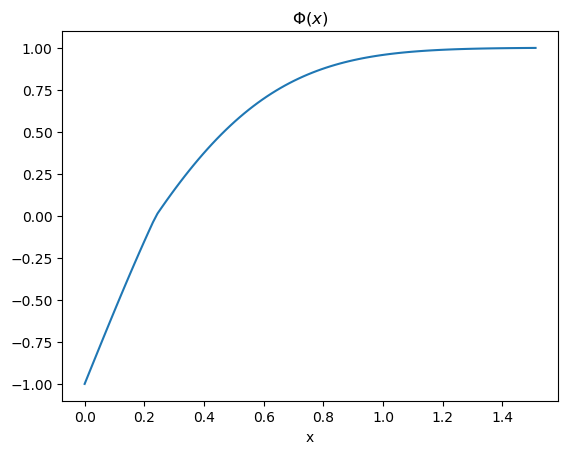

In [5]:
withfig(figure()) do
    plot(xGrid, map(TSS.TSE_Phi, xGrid))
    title(L"\Phi(x)")
    xlabel("x")
end

In [6]:
outputDir = joinpath(pwd(), "figures")
mkpath(outputDir)

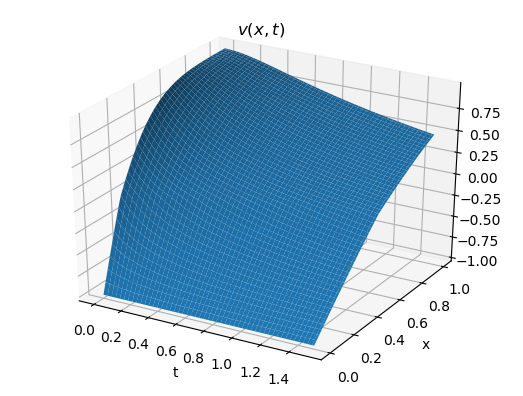

In [7]:
withfig(figure()) do
    surf(xGrid, tGrid, [TSS.TSE_v(x,t) for x in xGrid, t in tGrid])
    title(L"v(x,t)")
    xlabel("t")
    ylabel("x")
    savefig(joinpath(outputDir, "TikhonovSamarskiiSolveV.png"))
end

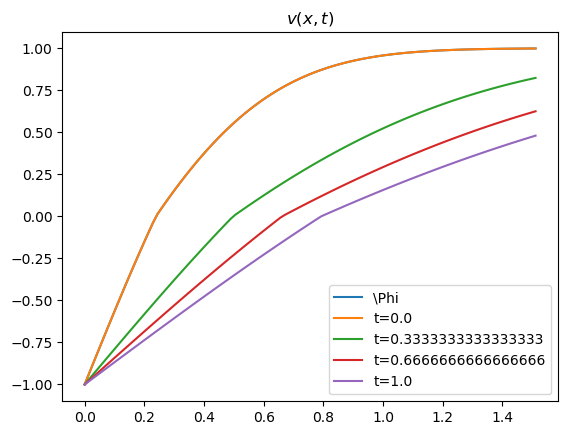

In [8]:
withfig(figure()) do
    plot(xGrid, map(TSS.TSE_Phi, xGrid))
    for t in TSS.TSE_tGrid(4)
        plot(xGrid, map(x->TSS.TSE_v(x,t), xGrid))
    end
    legend(append!(["\\Phi"], ["t=$t" for t in TSS.TSE_tGrid(4)]))
    title(L"v(x,t)")
    savefig(joinpath(outputDir, "TikhonovSamarskiiSolveVSlice.png"))
end

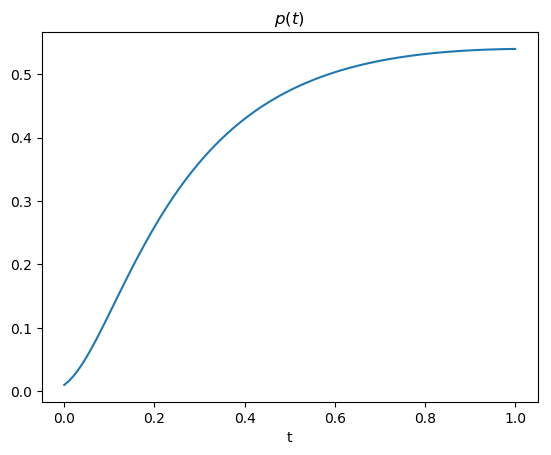

In [9]:
withfig(figure()) do
    plot(tGrid, map(TSS.TSE_p, tGrid))
    title(L"p(t)")
    xlabel("t")
    savefig(joinpath(outputDir, "TikhonovSamarskiiSolveP.png"))
end

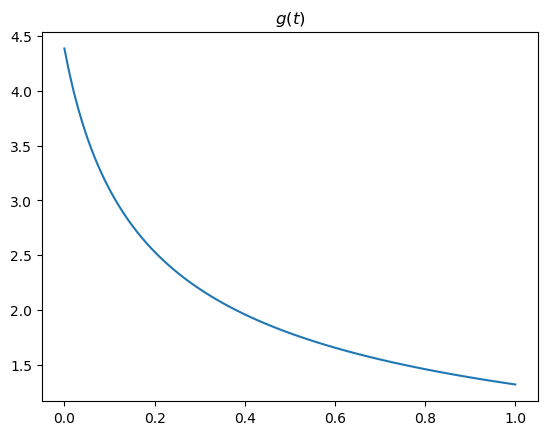

In [10]:
withfig(figure()) do
    plot(tGrid, map(TSS.TSE_g, tGrid))
    title(L"g(t)")
    savefig(joinpath(outputDir, "TikhonovSamarskiiSolveG.png"))
end

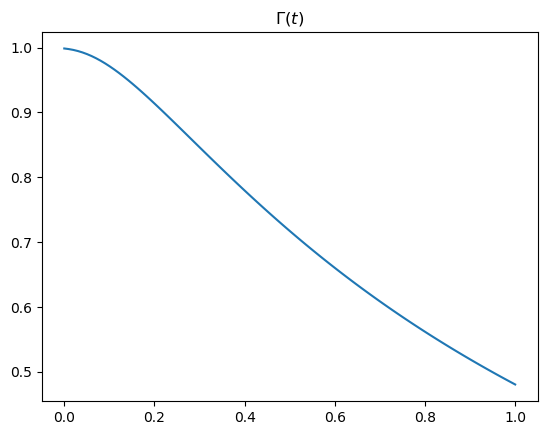

In [11]:
withfig(figure()) do
    plot(tGrid, map(TSS.TSE_Gamma, tGrid))
    title(L"\Gamma(t)")
    savefig(joinpath(outputDir, "TikhonovSamarskiiSolveGamma.png"))
end

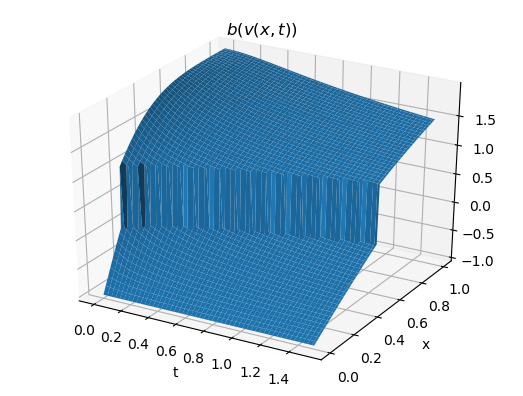

In [12]:
withfig(figure()) do
    surf(xGrid, tGrid, [TSS.TSE_b(TSS.TSE_v(x,t)) for x in xGrid, t in tGrid])
    title(L"b(v(x,t))")
    xlabel("t")
    ylabel("x")
end

In [13]:
NVals = 8:10:2000
L2ErrorVals = zeros(length(NVals))
for (i, N) in enumerate(NVals)

    lBdy = TSS.spaceLength
    xGrid = linspace(0,lBdy, N)
    tGrid = TSS.TSE_tGrid(N)

    vapprox = [TSS.TSE_v(x,t) for x in xGrid, t in tGrid]
    @static if VERSION >= v"0.7-"
        btapprox = diff([TSS.TSE_b(vapprox[i, j]) for i in eachindex(xGrid), j in eachindex(tGrid)], dims=2) / step(tGrid)
        vxxapprox = diff(diff(vapprox, dims=1), dims=1)/(step(xGrid)^2)
    else
        btapprox = diff([TSS.TSE_b(vapprox[i, j]) for i in eachindex(xGrid), j in eachindex(tGrid)], 2) / step(tGrid)
        vxxapprox = diff(diff(vapprox, 1), 1)/(step(xGrid)^2)
    end
    L2ErrorVals[i] = vecnorm(btapprox[1:(end-2), :] - vxxapprox[:, 1:(end-1)])*step(xGrid)*step(tGrid)
end

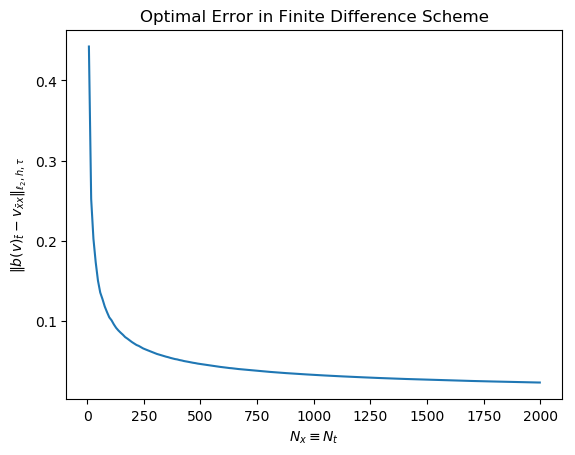

In [14]:
withfig(figure()) do
    plot(NVals, L2ErrorVals)
    title("Optimal Error in Finite Difference Scheme")
    xlabel(L"N_x \equiv N_t")
    ylabel(L"\Vert b(v)_\bar{t} - v_{\bar{x}x}\Vert_{\ell_2, h, \tau}")
    savefig(joinpath(outputDir, "TikhonovSamarskiiSolveApproxError.png"))
end

In [10]:
N=64

lBdy = TSS.spaceLength
xGrid = linspace(0,lBdy, N)
tGrid = TSS.TSE_tGrid(N)
vapprox = [TSS.TSE_v(x,t) for x in xGrid, t in tGrid]
btapprox = diff([TSS.TSE_b(vapprox[i, j]) for i in eachindex(xGrid), j in eachindex(tGrid)], 2) / step(tGrid)
vxxapprox = diff(diff(vapprox, 1), 1)/(step(xGrid)^2)
fapprox = btapprox[1:(end-2), :] - vxxapprox[:, 1:(end-1)]
withfig(figure()) do
    surf(xGrid[1:(end-2)], tGrid[1:(end-1)], fapprox)
    title(L"b(v)_\bar{t} - v_{\bar{x}x} \equiv f(x,t) \approx 0")
    xlabel("t")
    ylabel("x")
end

LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, C_NULL)) <type 'exceptions.ValueError'>
ValueError('shape mismatch: objects cannot be broadcast to a single shape',)
  File "/Users/jgoldfar/Documents/misc/env/bin/julia/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py", line 1624, in plot_surface
    X, Y, Z = np.broadcast_arrays(X, Y, Z)
  File "/Users/jgoldfar/Documents/misc/env/bin/julia/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/numpy/lib/stride_tricks.py", line 249, in broadcast_arrays
    shape = _broadcast_shape(*args)
  File "/Users/jgoldfar/Documents/misc/env/bin/julia/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/numpy/lib/stride_tricks.py", line 184, in _broadcast_shape
    b = np.broadcast(*args[:32])
[39m